1.Program to read a digital image. Split and display image into 4 quadrants, up,
down, right, and left.


In [4]:
from PIL import Image

# Load the image
image_path = r"C:\Users\Chetan\OneDrive\Pictures\Camera Roll\outrun-vaporwave-hd-wallpaper-preview.jpg"
image = Image.open(image_path)

# Get the dimensions of the image
width, height = image.size                                                         #we get the width and height of the image using the size attribute.

# Split the image into four quadrants   ----  using the crop method of the Image object.
#The crop method takes a tuple of four values representing the left, top, right, and bottom coordinates of the region to be cropped. 
#We use integer division (//) to get the center point of the image.
top_left = image.crop((0, 0, width//2, height//2))
top_right = image.crop((width//2, 0, width, height//2))
bottom_left = image.crop((0, height//2, width//2, height))
bottom_right = image.crop((width//2, height//2, width, height))

# Display the four quadrants ---using the show method of the Image object.
top_left.show()
top_right.show()
bottom_left.show()
bottom_right.show()

#Finally, we display the four quadrants  This will open the four quadrants in separate windows.

3.Read an image, first apply erosion to the image and
 then subtract the result from the original. 
Demonstrate the difference in the edge image if you use dilation instead of
erosion.


In [1]:
import cv2                                          # cv2 for OpenCV and numpy for array manipulation.
import numpy as np

# Load the image in grayscale
image_path = r'C:\Users\Chetan\Downloads\DIP\butterfly-1839679_1280.jpg'          #The r before the path string is used to handle any special characters in the path.
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)                       #The second argument, cv2.IMREAD_GRAYSCALE, indicates that we want to read the image in grayscale.

# Define the kernel size for erosion and dilation
kernel_size = 5

# Apply erosion to the grayscale image
eroded_image = cv2.erode(image, np.ones((kernel_size,kernel_size),np.uint8))       #The kernel used for erosion is a square matrix of ones with the specified kernel size.
#                                                                               The first argument is the input image (image), and the second argument is the kernel. 
#                                                                                   In this case, we create a kernel using np.ones() function, which generates a matrix of ones with the specified kernel size (5x5). The np.uint8 specifies the data type of the kernel. The resulting eroded image is stored in the eroded_image variable.

# Apply dilation to the grayscale image
dilated_image = cv2.dilate(image, np.ones((kernel_size,kernel_size),np.uint8))               #dilation expands the boundaries of the objects in the image. 

# Subtract the eroded image from the original grayscale image 
eroded_subtracted = cv2.absdiff(image, eroded_image)                       # This operation calculates the absolute difference between each corresponding pixel in the two images.
#                                                                       The resulting image highlights the edges in the original image. The resulting image is stored in the eroded_subtracted variable.

# Subtract the dilated image from the original
dilated_subtracted = cv2.absdiff(image, dilated_image)            #This operation also highlights the edges, but the edges will appear thicker compared to the eroded image. 
#                                                                   The resulting image is stored in the dilated_subtracted variable.

# Display the original, eroded-subtracted, and dilated-subtracted images
cv2.imshow('image',image)
cv2.imshow('eroded_subtracted', eroded_subtracted)
cv2.imshow('dilated_subtracted', dilated_subtracted)
cv2.waitKey(0)                                             #wait until a key is pressed (0 indicates an infinite wait) before closing the image windows.
cv2.destroyAllWindows()                                     #close all the open image windows.

Python program to demonstrate erosion and dilation of images

In [1]:
import cv2
import numpy as np

# Reading the input image
img = cv2.imread(r"C:\Users\Chetan\Downloads\DIP\butterfly-1839679_1280.jpg", 0)     #0, indicates that we want to read the image in grayscale.

# Taking a matrix of size 5 as the kernel
kernel = np.ones((5, 5), np.uint8)                  #We create a kernel matrix using np.ones() function. The kernel is a matrix of ones with a size of 5x5. 
#                                                   The np.uint8 specifies the data type of the kernel.

# The first parameter is the original image----- input image (img),
# kernel is the matrix with which image is convolved and ------ kernel matrix, 
# third parameter is the number of iterations, which will determine how much you want to erode/dilate a given image.
img_erosion = cv2.erode(img, kernel, iterations=1)                #iterations parameter is set to 1. This means erosion is applied once. 
img_dilation = cv2.dilate(img, kernel, iterations=1)

cv2.imshow('Input', img)
cv2.imshow('Erosion', img_erosion)
cv2.imshow('Dilation', img_dilation)
cv2.waitKey(0)                                #wait until a key is pressed (0 indicates an infinite wait) before closing the image windows.

2.Write a program to show rotation, scaling, and translation of an image.

In [6]:
from PIL import Image

# Load the image
image_path = r"C:\Users\Chetan\OneDrive\Pictures\Camera Roll\istockphoto-1188445864-612x612.jpg"
image = Image.open(image_path)

# Rotate the image by 45 degrees
rotated_image = image.rotate(45)

# Scale the image by 2 ------------- we scale the image by a factor of 2 using the resize method of the Image object.
#                                    We multiply the original dimensions of the image by 2 and pass them as a tuple to the resize method. 
#                                    We store the result in the scaled_image variable.
scaled_image = image.resize((image.width * 2, image.height * 2))

# Translate the image by (100, 50) pixels---using the transform method of the Image object.
#                                                     We pass three arguments to the transform method: the size of the output image, 
#                                                                                                      the transformation matrix (in this case, an affine transformation matrix),
#                                                                                                and a tuple representing the translation vector. 
#                                                     We store the result in the translated_image variable.
translated_image = image.transform(image.size, Image.AFFINE, (1, 0, 100, 0, 1, 50))

# Display the original, rotated, scaled, and translated images-----using the show method of the Image object.
image.show()
rotated_image.show()
scaled_image.show()
translated_image.show()

 #This will open each image in a separate window.

4.Read an image and extract and display low-level features such as edges, textures using
filtering Techniques.

In [11]:
import cv2

# Load the image
image_path = r"C:\Users\Chetan\OneDrive\Pictures\Camera Roll\edu_srch_amazing_space_the_moon.png"
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a Gaussian blur to the image                ---to reduce noise and smooth out the details. 
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply a Laplacian filter to the image
laplacian_image = cv2.Laplacian(blurred_image, cv2.CV_64F)

# Apply a Sobel filter to the image in the x direction
sobel_x_image = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=5)

# Apply a Sobel filter to the image in the y direction
sobel_y_image = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=5)

# Apply a Canny edge detector to the image
canny_image = cv2.Canny(blurred_image, 30, 100)

# Display the original, blurred, Laplacian, Sobel_x, Sobel_y, and Canny images
cv2.imshow('image',image)
cv2.imshow('blurred_image',blurred_image)
cv2.imshow('laplacian_image', laplacian_image)
cv2.imshow('sobel_x_image', sobel_x_image)
cv2.imshow('sobel_y_image', sobel_y_image)
cv2.imshow('canny_image', canny_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

5.Demonstrate enhancing and segmenting low contrast 2D images.


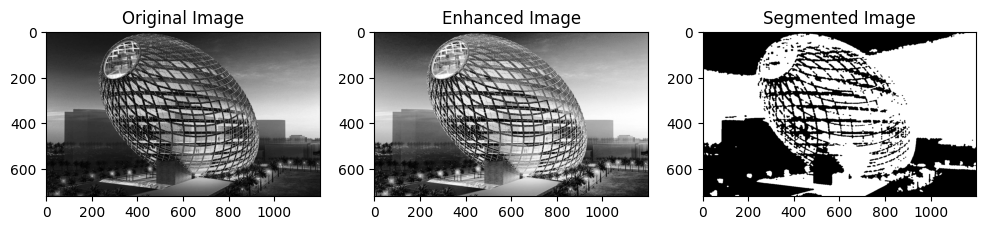

In [9]:
import cv2                         #cv2 for OpenCV  and matplotlib.pyplot for image visualization.
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread(r"C:\Users\Chetan\Downloads\DIP\newproject-5-.jpg", 0)                #read the image in grayscale

# Apply histogram equalization to the grayscale image
img_eq = cv2.equalizeHist(img)               #This operation enhances the image by improving its contrast. 

# Apply Otsu's thresholding to the equalized image
_, thresh = cv2.threshold(img_eq, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)            #0: The threshold value. In this case, it is set to 0 since we are using Otsu's thresholding method, and the threshold value is calculated automatically.
#                                                                                   255: The maximum value that will be assigned to pixels in the output image if they exceed the threshold. In this case, it is set to 255, which represents the maximum intensity value in an 8-bit grayscale image.
#                                                                                cv2.THRESH_BINARY + cv2.THRESH_OTSU: The thresholding type and any additional flags. In this case, we are using two flags:

#                                           cv2.THRESH_BINARY: This flag specifies that the thresholding type is binary, meaning pixels with intensity values below the threshold will be set to 0, and those above or equal to the threshold will be set to the maximum value (255 in this case).
#                                           cv2.THRESH_OTSU: This flag enables Otsu's thresholding method, which automatically calculates an optimal threshold value based on the image histogram. Otsu's method finds the threshold that minimizes the variance within the foreground and background regions of the image.
#                                                                                 The resulting thresholded image is stored in the thresh variable. 
#                                                                               The underscore _ is used to capture the threshold value, which is not used in this case.

# Perform morphological operations to remove noise and fill in gaps
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))          #We create a kernel using cv2.getStructuringElement() function. Here, we create an elliptical-shaped kernel with a size of 5x5.
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)         #perform morphological operations on the thresholded image. The cv2.morphologyEx() function is used twice.
#                                                                 First, we apply the closing operation (cv2.MORPH_CLOSE) to the thresholded image using the elliptical kernel.
#                                                                   This operation helps to remove noise and fill in gaps in the foreground object. 
#                                                                   The resulting image is stored in the closed variable.

opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel)  # apply the opening operation (cv2.MORPH_OPEN) to the closed image using the same elliptical kernel. 
#                                                             Opening helps to remove small background regions and smooth the object boundaries.
#                                                            The resulting image is stored in the opened variable.

# Display the images

fig, ax = plt.subplots(1, 3, figsize=(12, 4))       #We create a figure with three subplots using plt.subplots() function. 
#                                                    The first argument 1 indicates one row of subplots, the second argument 3 indicates three subplots in total.
#                                                    The figsize parameter specifies the size of the figure in inches.

#    use the imshow() function of each axis (ax) to display the original image, the enhanced image, and the segmented image. 

ax[0].imshow(img, cmap='gray')            #cmap='gray' argument is used to display the images in grayscale.
ax[0].set_title('Original Image')         # set titles for each subplot.

ax[1].imshow(img_eq, cmap='gray')
ax[1].set_title('Enhanced Image')

ax[2].imshow(opened, cmap='gray')
ax[2].set_title('Segmented Image')

plt.show()                             #display the figure with all the subplots.